In [1]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("dadosSP1.csv")
data.head()

Unnamed: 0 NO_MUNICIPIO_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  \
0           0              Araraquara      29.0       F            1   
1          21                 Diadema      19.0       F            1   
2          25         Santa Fé do Sul      24.0       M            1   
3          32               São Paulo      28.0       F            2   
4          45               São Paulo      18.0       F            1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  IN_TREINEIRO  \
0                1               11          1             0   
1                1                2          1             0   
2                1                7          1             0   
3                1               11          1             0   
4                1                1          1             0   

   TP_DEPENDENCIA_ADM_ESC  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0                     NaN       445.4       589.0       621.5       465.5   
1                     NaN       402.9       447.6       537.3       425.5   
2                     NaN       706.5       709.9       625.1       769.1   
3                     NaN       631.1       609.7       596.1       535.5   
4                     NaN       685.2       719.2       619.4       799.6   

   NU_NOTA_REDACAO Q006 Q027  
0            560.0    D    A  
1            640.0    B    A  
2            620.0    I    D  
3            720.0    J    A  
4            800.0    H    D

In [25]:
data_s = data.sample(2500)

In [26]:
data_s['Mean_notes'] = (data_s.NU_NOTA_CH+data_s.NU_NOTA_CN+data_s.NU_NOTA_LC + data_s.NU_NOTA_MT + data_s.NU_NOTA_REDACAO)/5

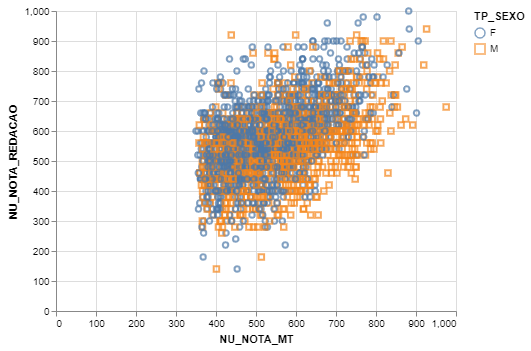

In [27]:
alt.Chart(data_s).mark_point().encode(x = 'NU_NOTA_MT', y = 'NU_NOTA_REDACAO', color = 'TP_SEXO', shape = 'TP_SEXO')

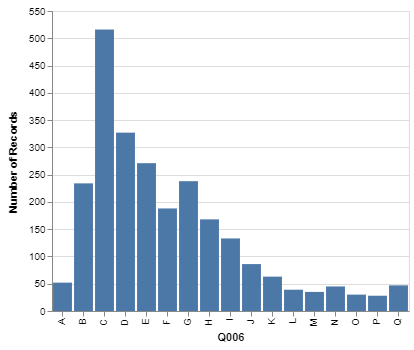

In [28]:
alt.Chart(data_s).mark_bar().encode(x='Q006', y = 'count()')

In [29]:
#mapping the dataframe
dic = {'A':0,'B':937,'C':1405,'D':1874,'E':2342,'F':2811,
       'G':3748,'H':4685,'I':5622,'J':6599,'K':7496,'L':8433,
       'M':9370,'N':11244,'O':14055,'P':18740,'Q':20000}
data_s.Q006 = data_s.Q006.map(dic)

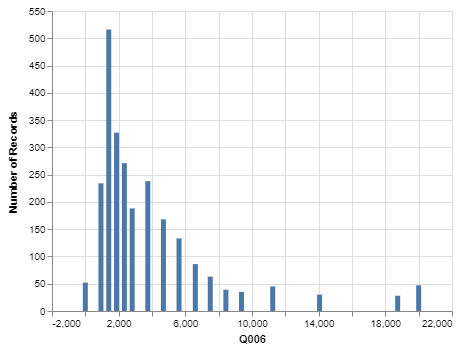

In [33]:
alt.Chart(data_s).mark_bar().encode(x='Q006', y = 'count()')

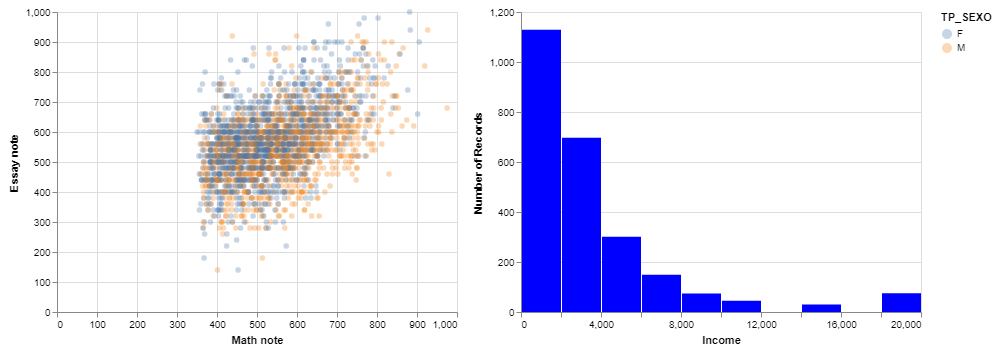

In [66]:
#ploting the altair
brush = alt.selection_interval()
chart1 = alt.Chart().mark_circle(opacity = 0.3).encode(
    alt.X('NU_NOTA_MT', title = 'Math note'), 
    alt.Y('NU_NOTA_REDACAO', title = 'Essay note'), 
    color=alt.Color('TP_SEXO',al)).add_selection(brush)
chart2 = alt.Chart().mark_bar().encode(
    alt.Y('count()'),
    alt.X('Q006', title = 'Income', bin = True),
    color=alt.value('blue')).transform_filter(brush)
alt.hconcat(chart1, chart2, data = data_s)

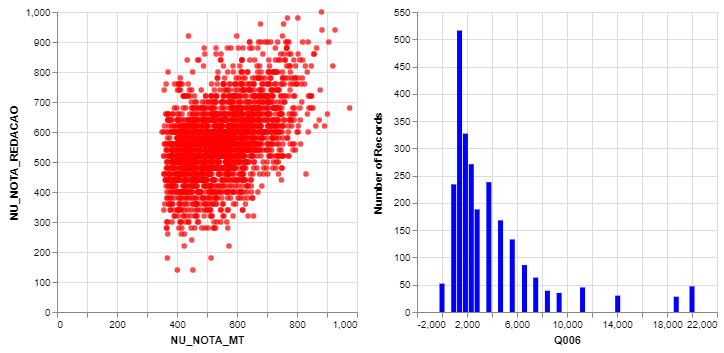

In [68]:
# interval selection in the scatter plot
pts = alt.selection(type="interval", encodings=["x"])

# left panel: scatter plot
points = alt.Chart().mark_point(filled=True, color="red").encode(
    x='NU_NOTA_MT',
    y='NU_NOTA_REDACAO'
).transform_filter(
    pts.ref()
).properties(
    width=300,
    height=300
)

# right panel: histogram
mag = alt.Chart().mark_bar().encode(
    x='Q006',
    y="count()",
    color=alt.condition(pts, alt.value("blue"), alt.value("lightgray"))
).properties(
    selection=pts,
    width=300,
    height=300
)

# build the chart:
alt.hconcat(
    points,
    mag,
    data=data_s
).transform_bin(
    "mbin",
    field="m",
    bin=alt.Bin(maxbins=20)
)

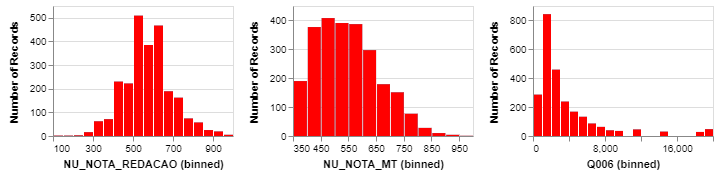

In [64]:
brush = alt.selection(type = 'interval', encodings = ['x'])
base = alt.Chart().mark_bar().encode(
    x = alt.X(alt.repeat('column'), type = 'quantitative', bin = alt.Bin(maxbins = 20)),
    y = 'count()'
).properties(
    width = 180,
    height = 130)
background = base.properties(selection = brush)
highlight = base.encode(
    color=alt.value('red')
).transform_filter(brush)
alt.layer(
    background,
    highlight,
    data = data_s,
).repeat(column = ['NU_NOTA_REDACAO','NU_NOTA_MT', 'Q006'])

index    Q006
0    1405  0.2064
1    1874  0.1308
2    2342  0.1084
3    3748  0.0952
4     937  0.0936
5    2811  0.0752
6    4685  0.0672
7    5622  0.0532
8    6599  0.0344
9    7496  0.0252
10      0  0.0208
11  20000  0.0188
12  11244  0.0180
13   8433  0.0156
14   9370  0.0140
15  14055  0.0120
16  18740  0.0112